In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ca = pd.read_csv('../../data/Initiated Building Permits (CA Tasks) 3yr.csv', 
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
fr = pd.read_csv('../../data/Initiated Building Permits (FR Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
pl = pd.read_csv('../../data/Initiated Building Permits (PL Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
pw = pd.read_csv('../../data/Initiated Building Permits (PW Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
sw = pd.read_csv('../../data/Initiated Building Permits (SW Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
ws = pd.read_csv('../../data/Initiated Building Permits (WS Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
u_o = pd.read_csv('../../data/Initiated Building Permits 3yr (Temp-Final U_O).csv',
                 parse_dates=['Date_Initiated','Date_Issued','Temp U&O Complete Date','Final U&O Complete Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
yr3 = pd.read_csv('../../data/Initiated Building Permits 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category'},
                         low_memory=False)
all_depts = pd.read_csv('../../data/all_depts_app.csv',
                 parse_dates=['Date_Initiated','Date_Issued'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category'},
                         low_memory=False)

In [5]:
u_o = u_o.dropna(subset = ['Final U&O Complete Date'])

In [6]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284620 entries, 0 to 284619
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PERMIT #            284620 non-null  object        
 1   CASE_TYPE           284620 non-null  category      
 2   CASE_TYPE_DESC      284620 non-null  object        
 3   SUB_TYPE            284620 non-null  category      
 4   SUB_TYPE_DESC       284620 non-null  object        
 5   CONSTRUCTION COST   284620 non-null  float64       
 6   Square Footage      284620 non-null  float64       
 7   STATUS_CODE         284620 non-null  category      
 8   Date_Initiated      284620 non-null  datetime64[ns]
 9   Date_Issued         276006 non-null  datetime64[ns]
 10  TASK_CODE           284620 non-null  object        
 11  TASK_DESC           284620 non-null  object        
 12  RESULT_CODE         284618 non-null  category      
 13  RESULT_DESC         284620 no

In [4]:
ca = ca[~ca['PERMIT #'].astype(str).str.startswith('T', 'D')]
fr = fr[~fr['PERMIT #'].astype(str).str.startswith('T', 'D')]
pl = pl[~pl['PERMIT #'].astype(str).str.startswith('T', 'D')]
pw = pw[~pw['PERMIT #'].astype(str).str.startswith('T', 'D')]
sw = sw[~sw['PERMIT #'].astype(str).str.startswith('T', 'D')]
ws = ws[~ws['PERMIT #'].astype(str).str.startswith('T', 'D')]
u_o = u_o[~u_o['PERMIT #'].astype(str).str.startswith('T', 'D')]

In [5]:
ca['delta_task'] = ca['Task_Complete_Date'] - ca['Date_Initiated']
pl['delta_task'] = pl['Task_Complete_Date'] - pl['Date_Initiated']
fr['delta_task'] = fr['Task_Complete_Date'] - fr['Date_Initiated']
pw['delta_task'] = pw['Task_Complete_Date'] - pw['Date_Initiated']
sw['delta_task'] = sw['Task_Complete_Date'] - sw['Date_Initiated']
ws['delta_task'] = ws['Task_Complete_Date'] - ws['Date_Initiated']
u_o['delta_task'] = u_o['Final U&O Complete Date'] - u_o['Date_Initiated']

In [21]:
subset_com = ['Building Commercial - Rehab', 'Building Commercial - Tenant Finish Out', 'Building Commercial - New']
subset_res = ['Building Residential - New','Building Residential - Rehab', 'Building Residential - Addition']
colors = ["#573a6e"]
p = sns.set_palette(sns.color_palette(colors))

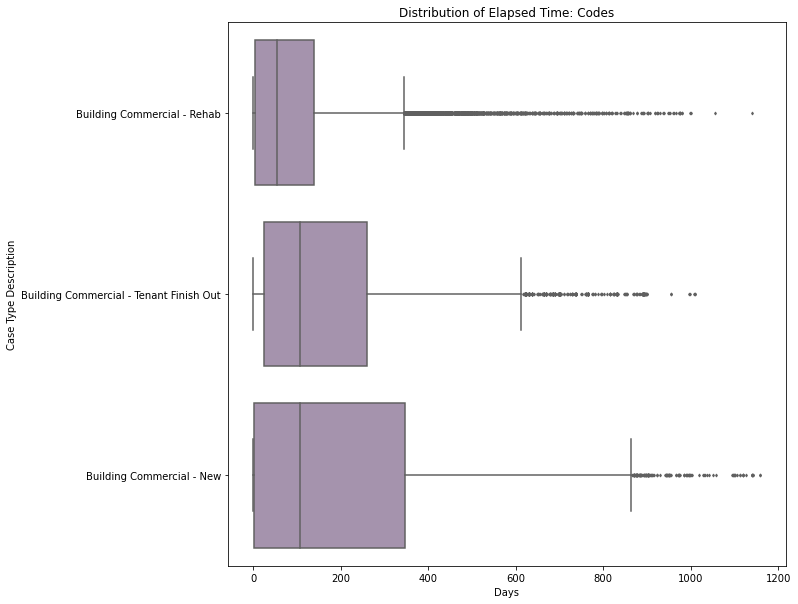

In [29]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=ca['delta_task'].dt.days, y=ca.loc[ca['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Codes')
ax.set(ylabel= 'Case Type Description', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Ccodes.png', bbox_inches = "tight", transparent = True, dpi=300)

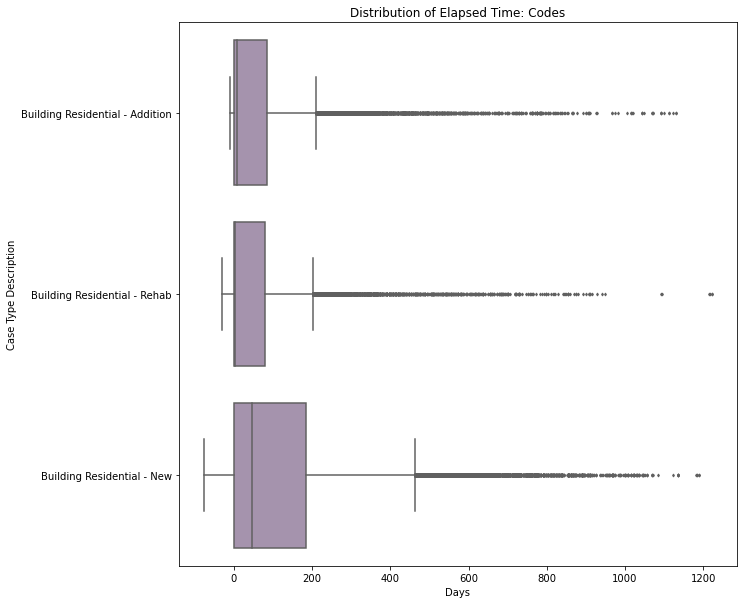

In [28]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=ca['delta_task'].dt.days, y=ca.loc[ca['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Codes')
ax.set(ylabel= 'Case Type Description', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rcodes.png', bbox_inches = "tight", transparent = True, dpi=300)

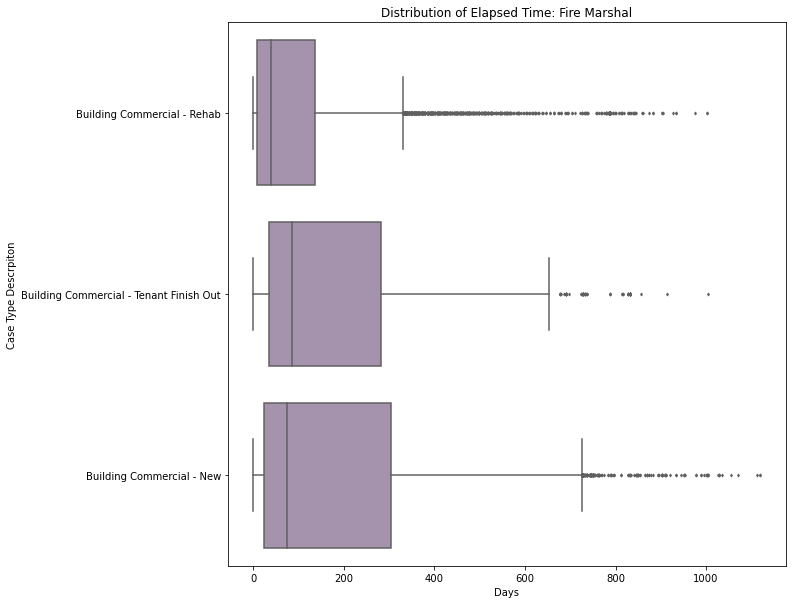

In [24]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=fr['delta_task'].dt.days, y=fr.loc[fr['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Fire Marshal')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Cfire.png', bbox_inches = "tight", transparent = True, dpi=300)

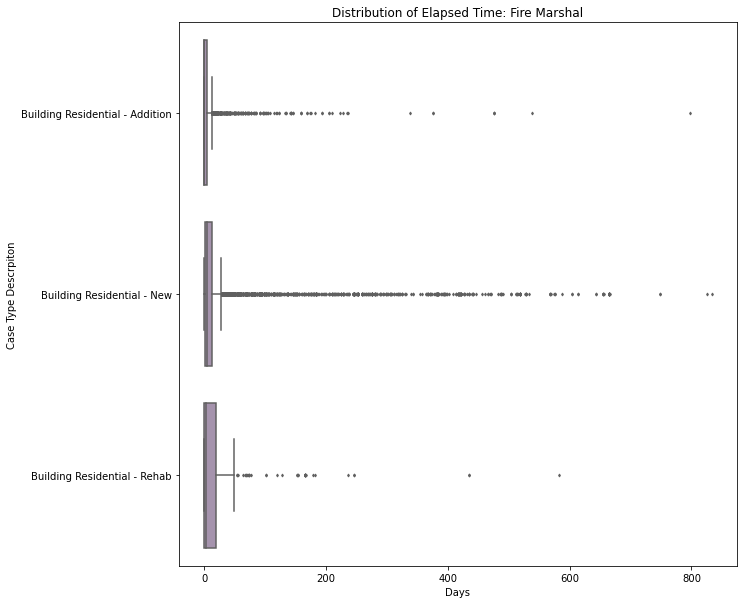

In [25]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=fr['delta_task'].dt.days, y=fr.loc[fr['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Fire Marshal')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rfire.png', bbox_inches = "tight", transparent = True, dpi=300)

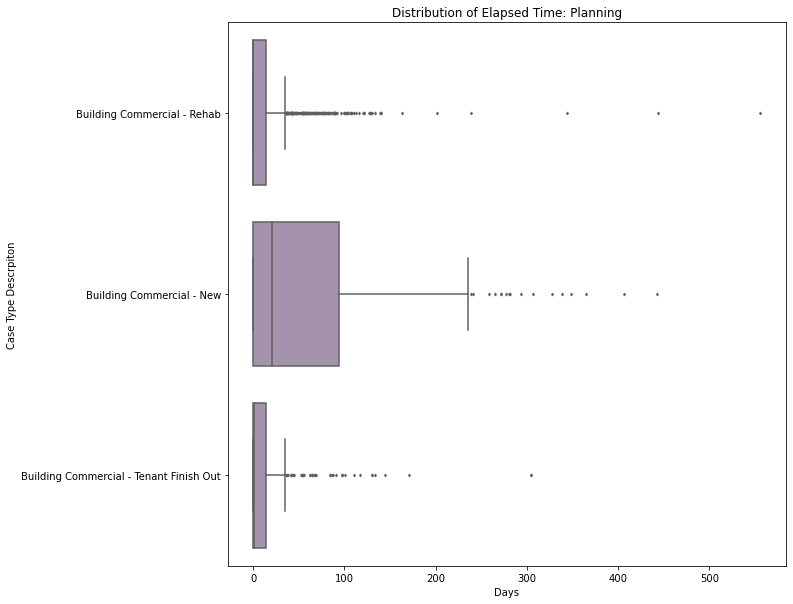

In [27]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=pl['delta_task'].dt.days, y=pl.loc[pl['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Planning')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Cplanning.png', bbox_inches = "tight", transparent = True, dpi = 300)

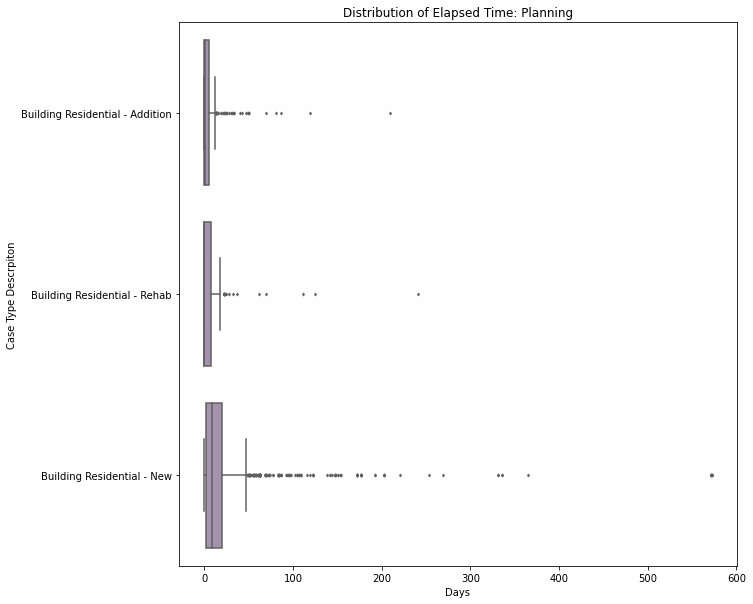

In [26]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=pl['delta_task'].dt.days, y=pl.loc[pl['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Planning')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rplanning.png', bbox_inches = "tight", transparent = True, dpi = 300)

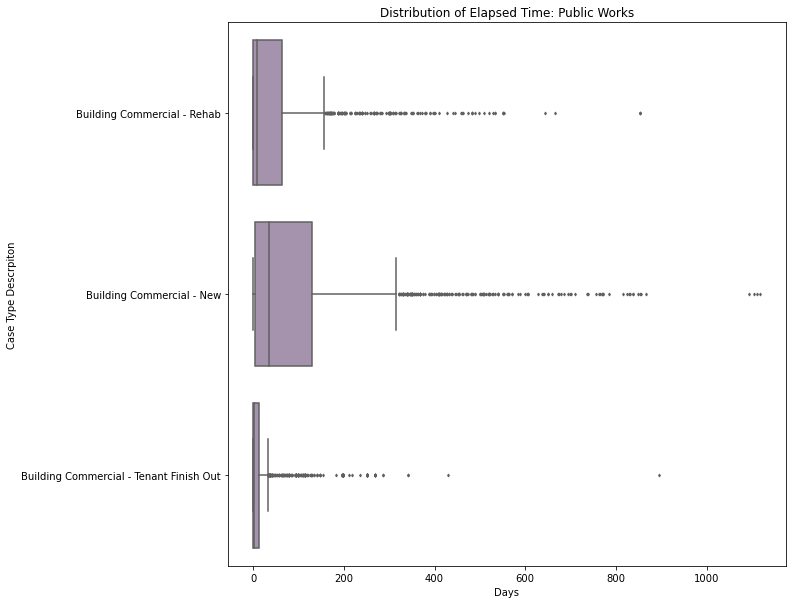

In [30]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=pw['delta_task'].dt.days, y=pw.loc[pw['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Public Works')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Cpublicworks.png', bbox_inches = "tight", transparent = True, dpi=300)

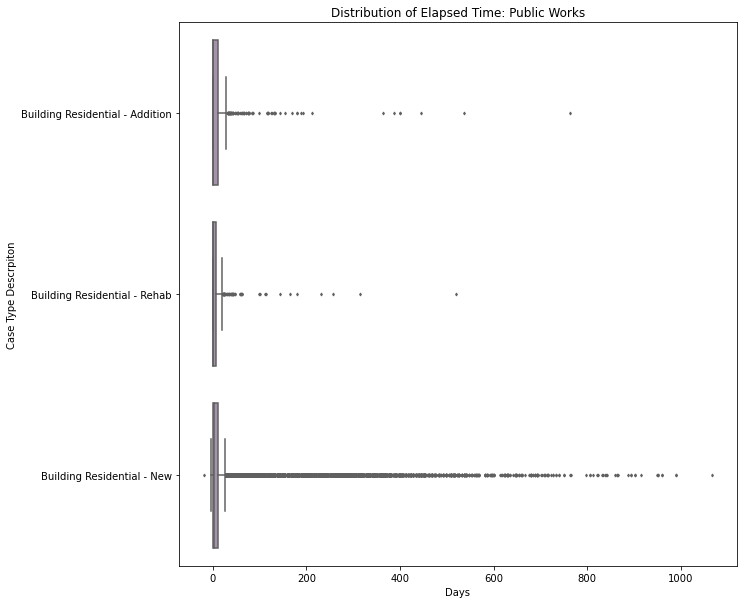

In [31]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=pw['delta_task'].dt.days, y=pw.loc[pw['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Public Works')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rpublicworks.png', bbox_inches = "tight", transparent = True, dpi=300)

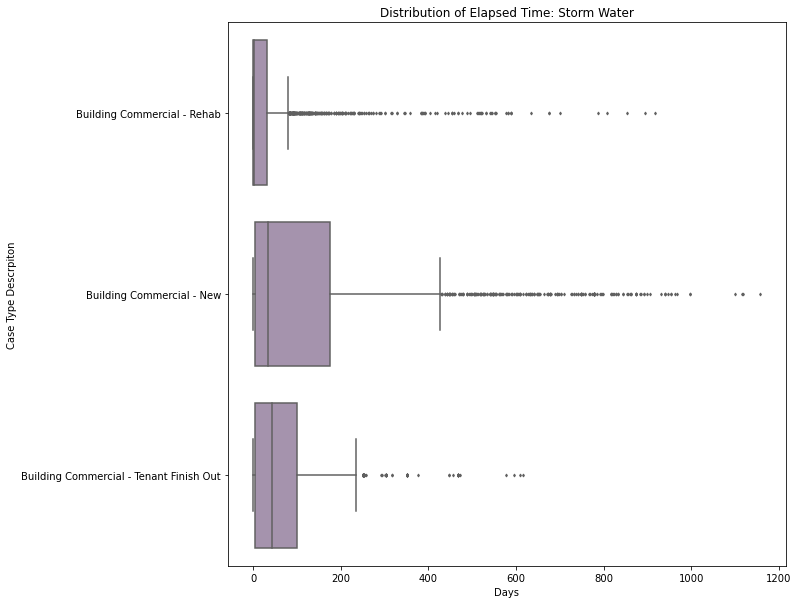

In [33]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=sw['delta_task'].dt.days, y=sw.loc[sw['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax,fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Storm Water')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Cstormwater.png', bbox_inches = "tight", transparent = True,dpi=300)

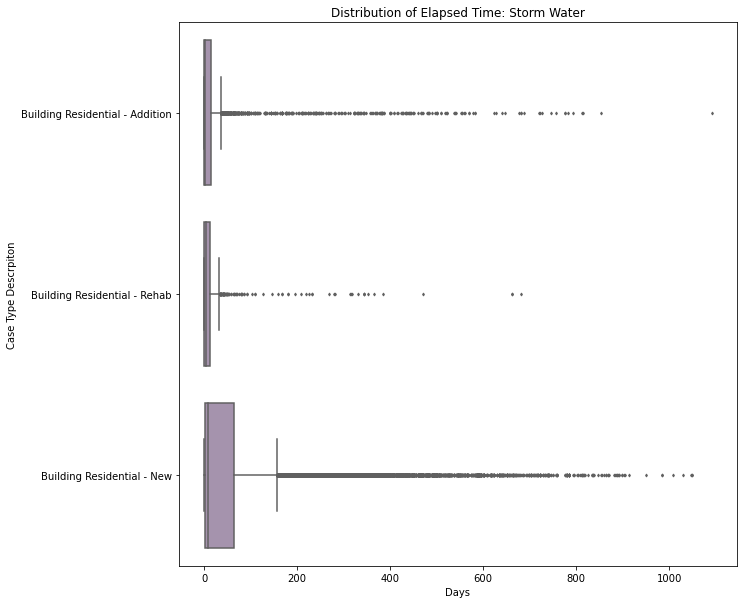

In [32]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=sw['delta_task'].dt.days, y=sw.loc[sw['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax,fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Storm Water')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rstormwater.png', bbox_inches = "tight", transparent = True,dpi=300)

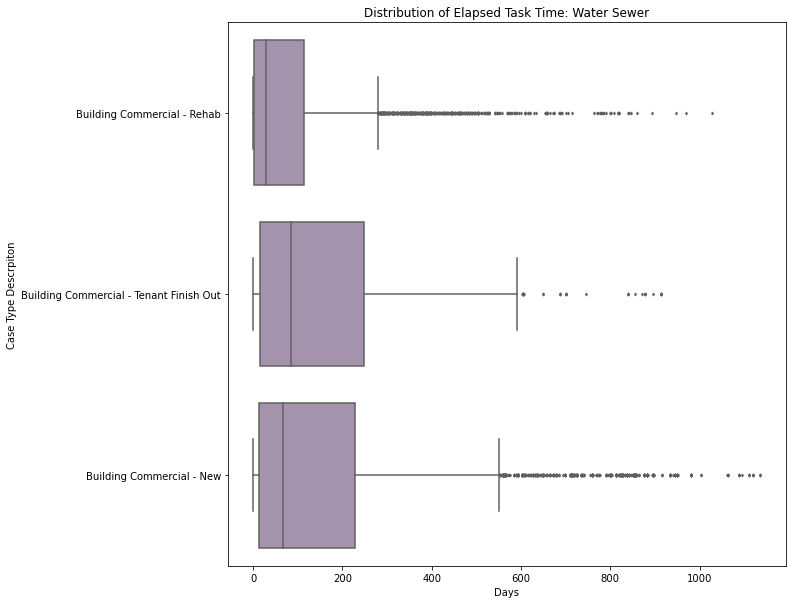

In [34]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=ws['delta_task'].dt.days, y=ws.loc[ws['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'], color = "#a78fb1", ax=ax,fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Task Time: Water Sewer')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Cwatersewer.png', bbox_inches = "tight", transparent = True, dpi=300)

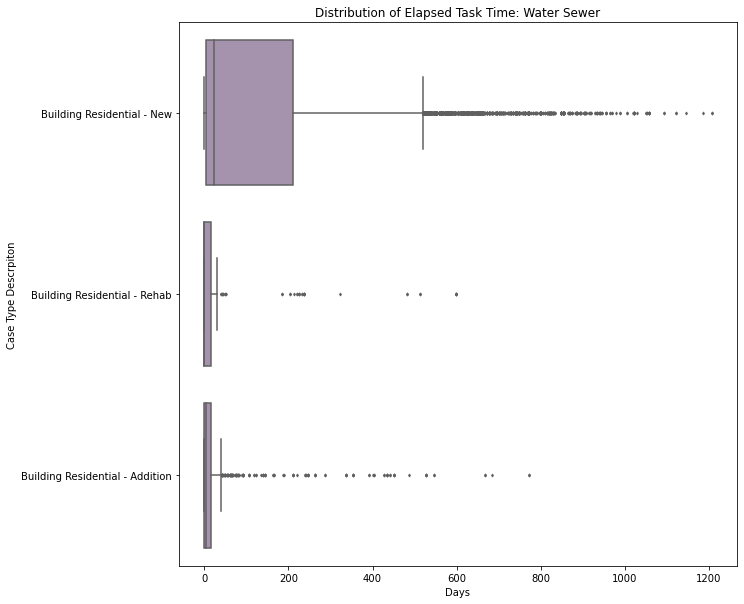

In [35]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=ws['delta_task'].dt.days, y=ws.loc[ws['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'], color = "#a78fb1", ax=ax,fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Task Time: Water Sewer')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rwatersewer.png', bbox_inches = "tight", transparent = True, dpi=300)

In [13]:
u_o.CASE_TYPE_DESC.value_counts()

Building Residential - New                  8811
Building Commercial - Rehab                 1624
Building Residential - Rehab                 963
Building Commercial - Tenant Finish Out      784
Building Residential - Addition              710
Building Commercial - New                    257
Building Commercial - Addition                65
Building Residential Rehab Storm Damage       61
Building Commercial - Shell                   59
Building Residential - Tenant Finish Out      44
Building Commercial Rehab Storm Damage        41
Building Residential New Storm Damage         31
Building Residential - Change Contractor      30
Building Residential - Fire Damage            29
Building Residential - Amend Permit           21
Building Commercial - Fire Damage             18
Building Commercial - Foundation              11
Building Commercial - Roofing / Siding         7
Building Residential - Roofing / Siding        4
Building Commercial - Change Contractor        3
Building Commercial 

In [14]:
subset = ['Building Residential - New', 'Building Commercial - Rehab', 'Building Residential - Rehab', 'Building Commercial - Tenant Finish Out', 'Building Residential - Addition', 'Building Commercial - New']

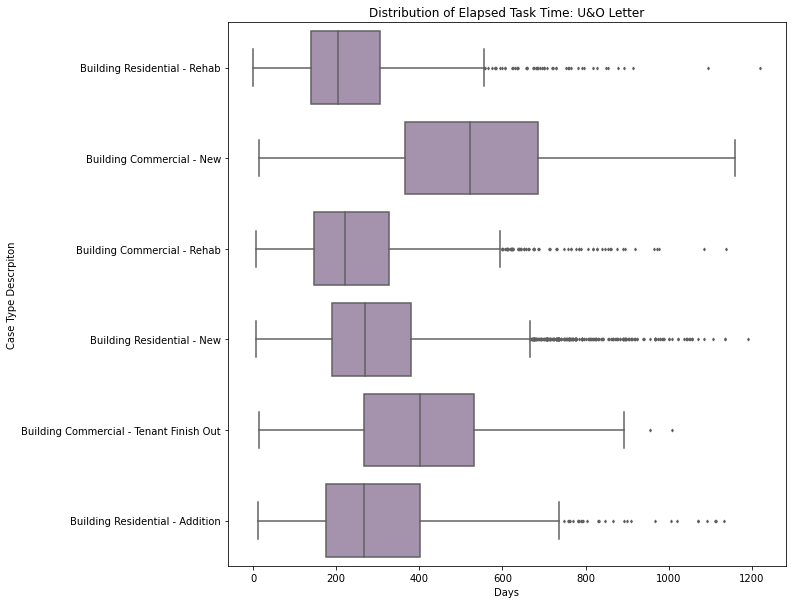

In [15]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=u_o['delta_task'].dt.days, y=u_o.loc[u_o['CASE_TYPE_DESC'].isin(subset), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax,fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Task Time: U&O Letter')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/UO.png', bbox_inches = "tight", transparent = True,dpi=300)

In [16]:
u_o['postissuedtask'] = True
u_o['phase']= 'inspection'
u_o['Task_Complete_Date'] = u_o['Final U&O Complete Date']
u_o = u_o.dropna(subset=['Final U&O Complete Date'])
u_o['deltatask'] = u_o['Task_Complete_Date'] - u_o['Date_Initiated'].copy()
u_o = u_o.astype({'deltatask':"timedelta64[D]"})


In [17]:
u_o['deltaapp'] = u_o['Date_Issued'] - u_o['Date_Initiated'].copy()
u_o['deltainspect'] = u_o['Task_Complete_Date'] - u_o['Date_Issued'].copy()
u_o = u_o.astype({'deltaapp':"timedelta64[D]"})
u_o = u_o.astype({'deltainspect':"timedelta64[D]"})


In [19]:
new_columns = {'deltaapp': 'Application Phase',
               'deltainspect' : 'Inspection Phase', 
               'deltatask': 'Total'}

u_o_pivot = u_o_pivot.reset_index()
u_o_pivot.columns = u_o_pivot.columns.map(''.join)
u_o_pivot.rename(columns = new_columns, inplace=True)
u_o_pivot.columns


Index(['CASE_TYPE_DESC', 'Application Phase', 'Inspection Phase', 'Total'], dtype='object')

In [20]:
u_o_pivot = pd.pivot_table(u_o, values=['deltaapp', 'deltainspect', 'deltatask'], index='CASE_TYPE_DESC', aggfunc=np.mean)
u_o_pivot

deltaapp  deltainspect   deltatask
CASE_TYPE_DESC                                                                
Building Commercial - Addition             86.153846    259.707692  345.861538
Building Commercial - Change Contractor    10.000000    145.333333  155.333333
Building Commercial - Fire Damage          43.611111    304.555556  348.166667
Building Commercial - Foundation           48.363636    553.363636  601.727273
Building Commercial - New                 122.548638    407.354086  529.902724
Building Commercial - Rehab                59.180419    197.619458  256.799877
Building Commercial - Roofing / Siding      6.285714    248.428571  254.714286
Building Commercial - Shell               138.305085    481.016949  619.322034
Building Commercial - Structural Frame     92.000000    745.500000  837.500000
Building Commercial - Tenant Finish Out    98.873724    307.094388  405.968112
Building Commercial New Storm Damage       34.333333     88.333333  122.666667
Building Commercial Rehab Storm Damage     38.170732    198.512195  236.682927
Building Residential - Addition            14.100000    295.857746  309.957746
Building Residential - Amend Permit         9.190476    379.666667  388.857143
Building Residential - Change Contractor    6.166667    225.233333  231.400000
Building Residential - Fire Damage          5.344828    197.241379  202.586207
Building Residential - Foundation           0.000000    504.000000  504.000000
Building Residential - New                 24.144932    280.594144  304.739076
Building Residential - Rehab                7.684320    236.760125  244.444444
Building Residential - Roofing / Siding    27.250000    193.250000  220.500000
Building Residential - Shell              147.000000    592.000000  739.000000
Building Residential - Tenant Finish Out  192.727273    517.977273  710.704545
Building Residential New Storm Damage      35.741935    253.580645  289.322581
Building Residential Rehab Storm Damage    13.852459    182.442623  196.295082

In [38]:
all_depts
subset_com = ['Building Commercial - Rehab', 'Building Commercial - Tenant Finish Out', 'Building Commercial - New']
subset_res = ['Building Residential - New','Building Residential - Rehab', 'Building Residential - Addition']

PERMIT # CASE_TYPE                     CASE_TYPE_DESC   SUB_TYPE  \
0       2020055468      CACN          Building Commercial - New  CAF21S001   
1       2020064285      CARN         Building Residential - New  CAA01R301   
2       2020064293      CARN         Building Residential - New  CAA01R301   
3       2020064344      CARN         Building Residential - New  CAA01R301   
4       2020064354      CARN         Building Residential - New  CAA01R301   
...            ...       ...                                ...        ...   
332178  2018000117      CARR       Building Residential - Rehab  CAA01R301   
332179  2018000151      CARA    Building Residential - Addition  CAA14U015   
332180  2018000187      CARR       Building Residential - Rehab  CAA01R301   
332181  2018000091      CACF   Building Commercial - Foundation  CAF19A203   
332182  2018000084      CACJ  Building Commercial - Fire Damage  CAA03R398   

                                   SUB_TYPE_DESC  CONSTRUCTION COST  \
0       Self Service Storage, Storage Mod Hazard          727116.00   
1                        Single Family Residence          226656.08   
2                        Single Family Residence          226656.08   
3                        Single Family Residence          226656.08   
4                        Single Family Residence          226656.08   
...                                          ...                ...   
332178                   Single Family Residence           10000.00   
332179                Accessory Structure, Decks           29232.65   
332180                   Single Family Residence            2000.00   
332181                 Restaurant (Full Service)         1957453.78   
332182   Multifamily, Tri-Plex, Quad, Apartments           10000.00   

        Square Footage STATUS_CODE Date_Initiated Date_Issued   TASK_CODE  \
0                 7800       ISSUE     2020-09-03  2021-05-10    FRBALMRQ   
1                 2062       ISSUE     2020-10-13  2021-05-27     FRBLIFE   
2                 2062       ISSUE     2020-10-13  2021-05-27     FRBLIFE   
3                 2062       ISSUE     2020-10-13  2021-05-27     FRBLIFE   
4                 2062       ISSUE     2020-10-13  2021-05-27     FRBLIFE   
...                ...         ...            ...         ...         ...   
332178               0        DONE     2018-01-02  2018-01-02  CABOKTOPAY   
332179             655        DONE     2018-01-02  2018-01-02  CABOKTOPAY   
332180               0        DONE     2018-01-02  2018-01-02  CABOKTOPAY   
332181          237015        DONE     2018-01-02  2018-01-30   CAB1PLRCV   
332182               0        DONE     2018-01-02  2018-01-02   CAB2PLASG   

                                       TASK_DESC RESULT_CODE  \
0                    [B]  Fire Alarm Requirement          NO   
1       [B]  Fire Life Safety Review On Bldg App      IGNORE   
2       [B]  Fire Life Safety Review On Bldg App      IGNORE   
3       [B]  Fire Life Safety Review On Bldg App      IGNORE   
4       [B]  Fire Life Safety Review On Bldg App      IGNORE   
...                                          ...         ...   
332178                 Building Payment Approval   OK TO PAY   
332179                 Building Payment Approval   OK TO PAY   
332180                 Building Payment Approval   OK TO PAY   
332181              [B]  Building Plans Received  PAPERPLANS   
332182          [B]  Plans Picked Up By Customer         YES   

                               RESULT_DESC Task_Complete_Date dept  deltatask  \
0                                       No          5/10/2021   fr        249   
1       No sign-off needed on this project           5/6/2021   fr        205   
2       No sign-off needed on this project           5/6/2021   fr        205   
3       No sign-off needed on this project           5/6/2021   fr        205   
4       No sign-off needed on this project           5/6/2021   fr        205   
...                                    .

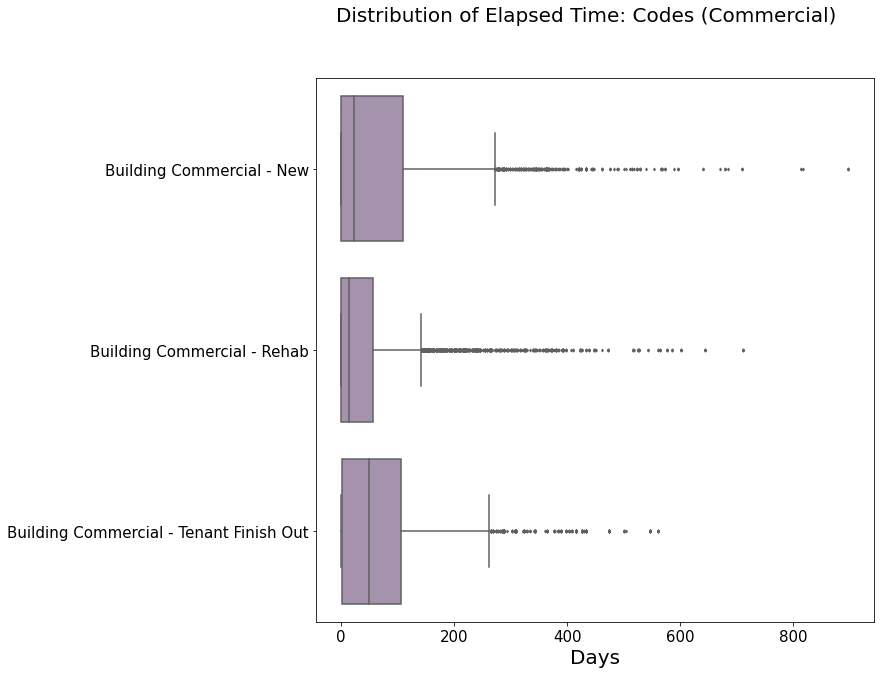

In [71]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'ca', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Codes (Commercial)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Ccodes.png', bbox_inches = "tight", transparent = True, dpi=300)

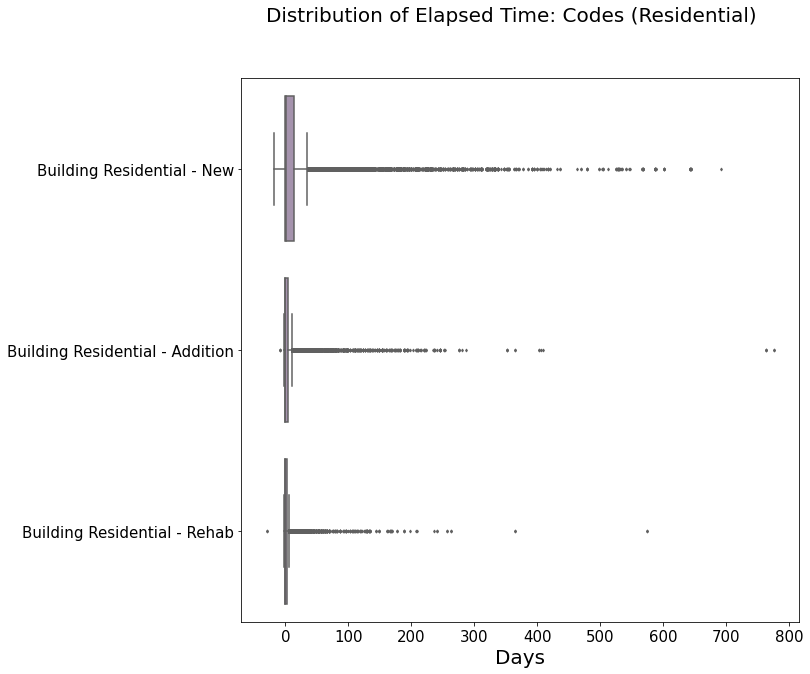

In [75]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'ca', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Codes (Residential)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rcodes.png', bbox_inches = "tight", transparent = True, dpi=300)

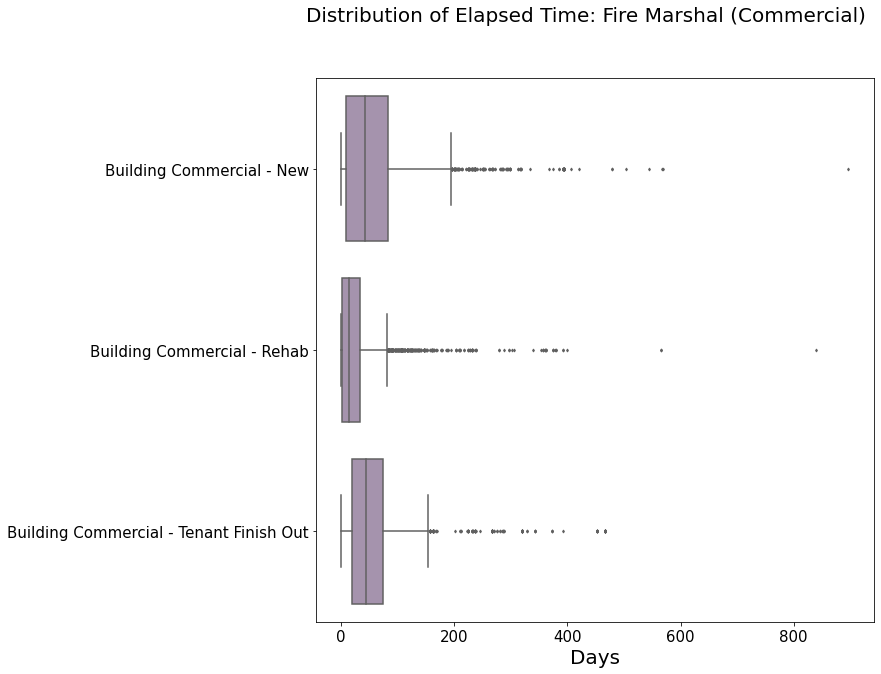

In [76]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'fr', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Fire Marshal (Commercial)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Cfire.png', bbox_inches = "tight", transparent = True, dpi=300)

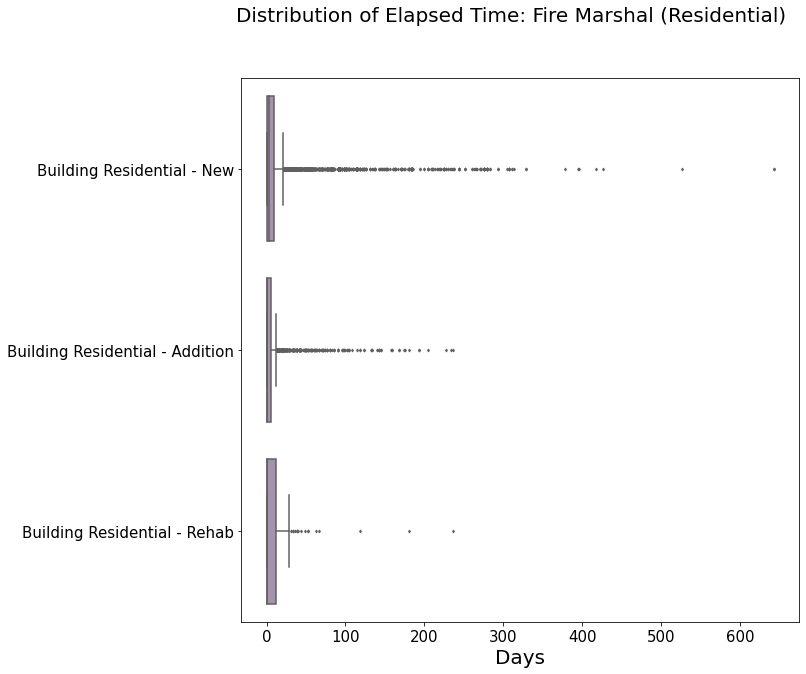

In [77]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'fr', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Fire Marshal (Residential)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rfire.png', bbox_inches = "tight", transparent = True, dpi=300)

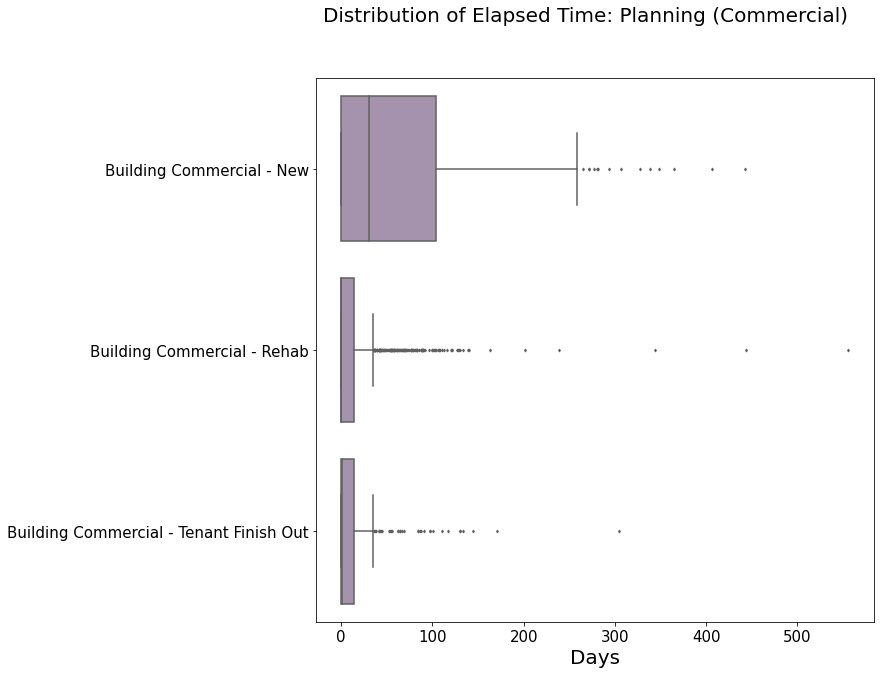

In [78]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'pl', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Planning (Commercial)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Cplanning.png', bbox_inches = "tight", transparent = True, dpi=300)

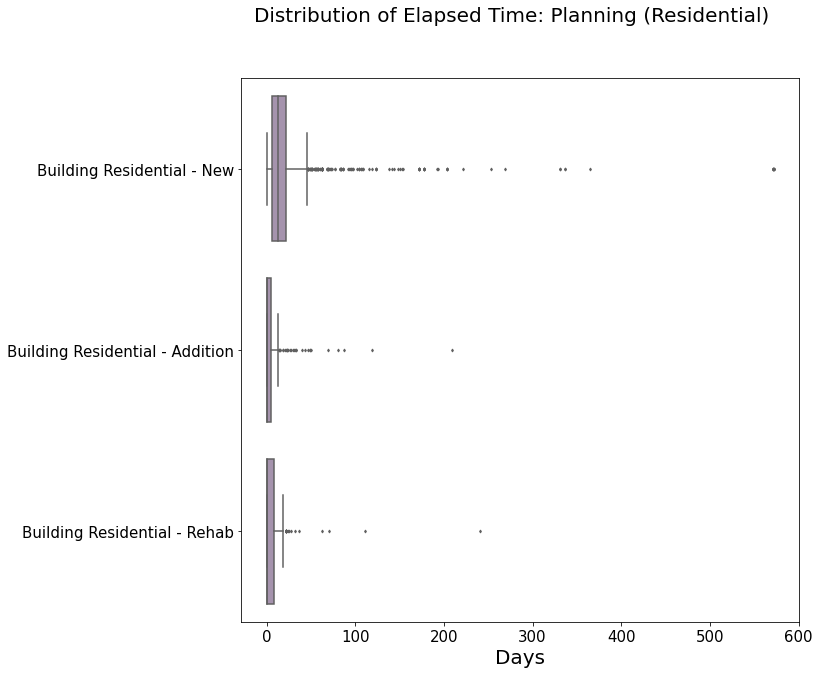

In [79]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'pl', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Planning (Residential)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rplanning.png', bbox_inches = "tight", transparent = True, dpi=300)

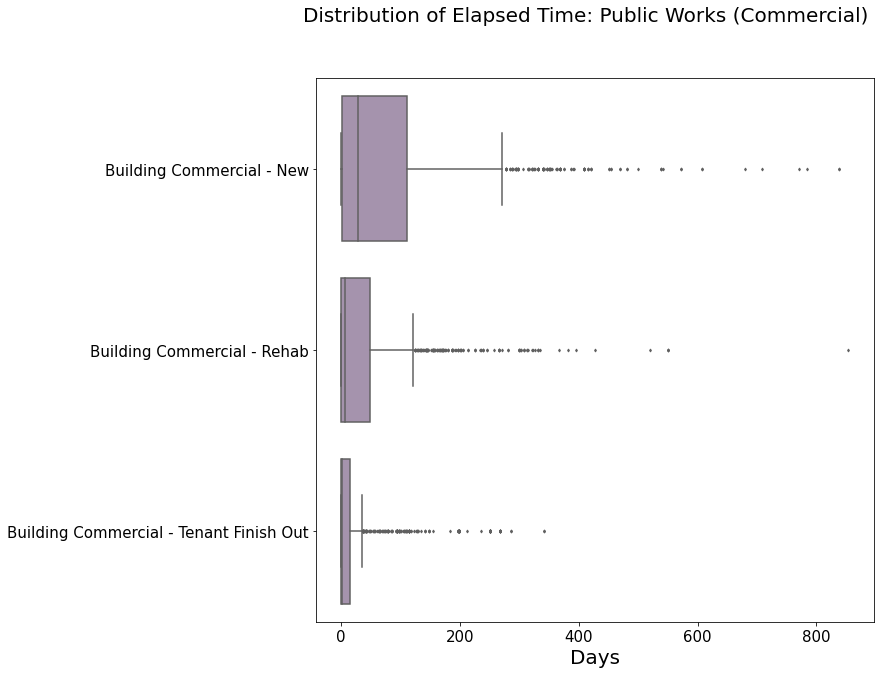

In [80]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'pw', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Public Works (Commercial)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Cpublicworks.png', bbox_inches = "tight", transparent = True, dpi=300)

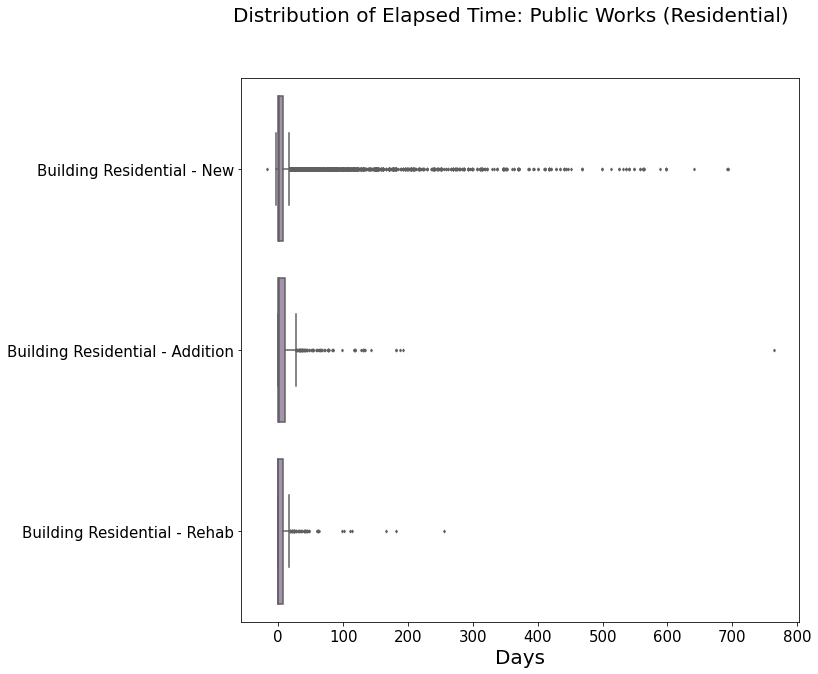

In [81]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'pw', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Public Works (Residential)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rpublicworks.png', bbox_inches = "tight", transparent = True, dpi=300)

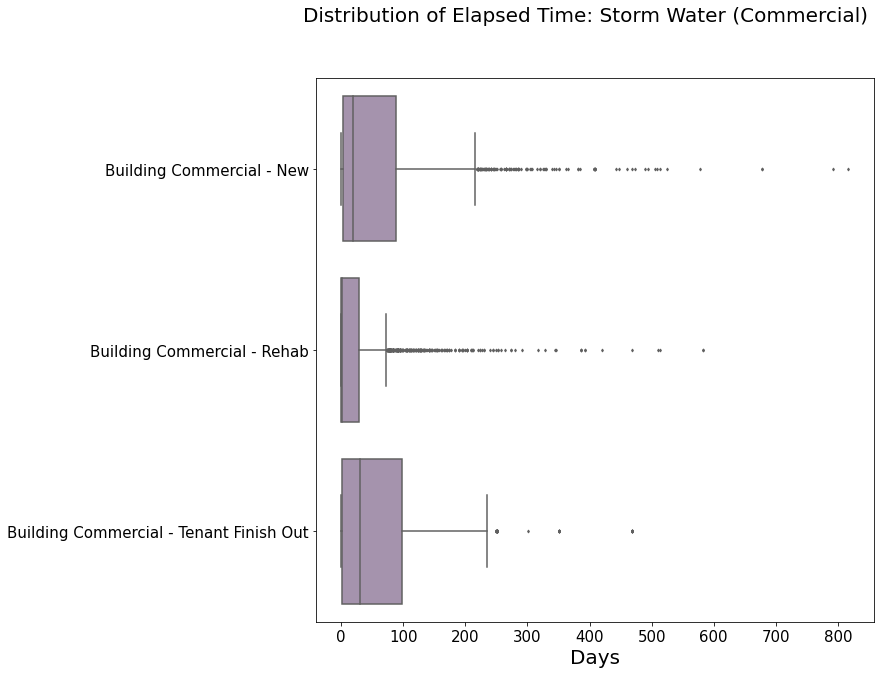

In [82]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'sw', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Storm Water (Commercial)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Cstormwater.png', bbox_inches = "tight", transparent = True, dpi=300)

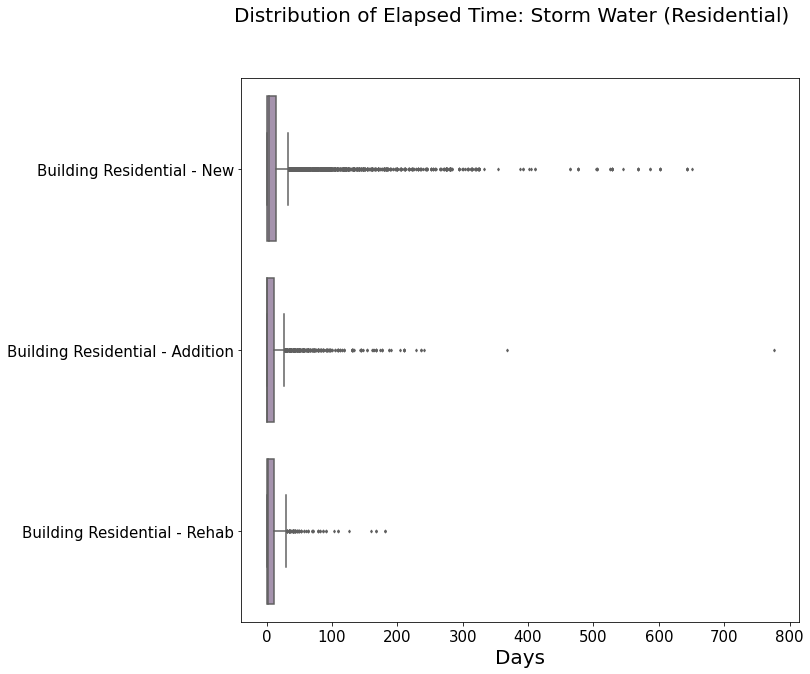

In [83]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'sw', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Storm Water (Residential)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rstormwater.png', bbox_inches = "tight", transparent = True, dpi=300)

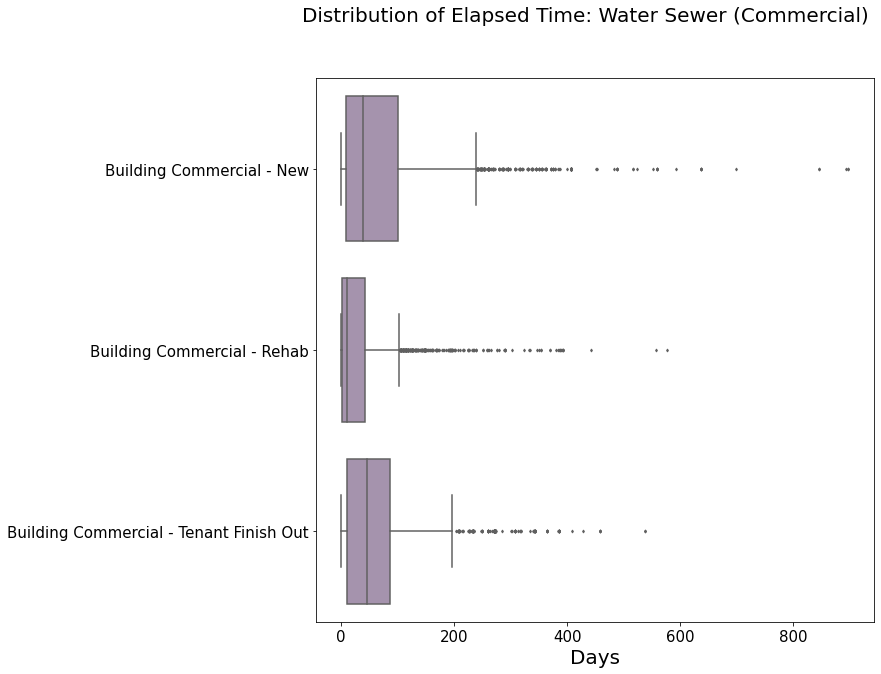

In [84]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'ws', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_com), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Water Sewer (Commercial)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Cwatersewer.png', bbox_inches = "tight", transparent = True, dpi=300)

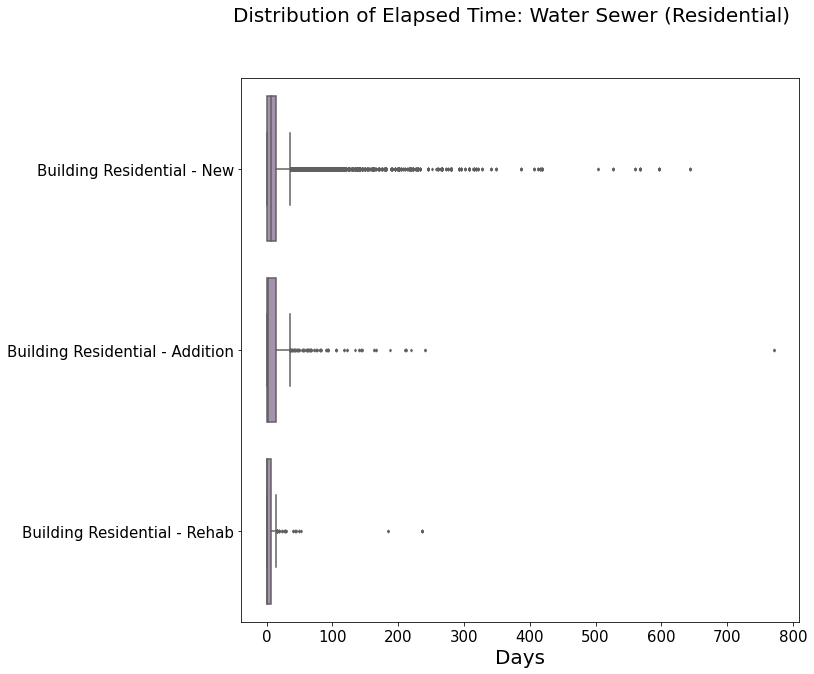

In [85]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=all_depts.loc[all_depts['dept'] == 'ws', 'deltatask'], y=all_depts.loc[all_depts['CASE_TYPE_DESC'].isin(subset_res), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
fig.suptitle("Distribution of Elapsed Time: Water Sewer (Residential)",fontsize=20)
ax.set_xlabel("X Label",fontsize=20)
ax.set_ylabel("",fontsize=20)
ax.tick_params(labelsize=15)
ax.set(xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/Rwatersewer.png', bbox_inches = "tight", transparent = True, dpi=300)